In [1]:
%matplotlib inline

In [2]:
import requests
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedDict

counties_population = dict()

# process data INS
with open('data_ins/demographic_data_2015.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row:
            if 'Valoare' not in row[6] and 'Regiune' not in row[3] and 'REGIUNE' not in row[3]:
                counties_population[row[3].strip()] = int(row[6].strip())

# print(SortedDict(counties_population))

vaccines = dict()
vaccines_all = dict()

# process data DATA.GOV.RO
with open('data_gov_ro/vaccinari2017/data/copii.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        if row[0] not in vaccines:
            vaccines[row[0]] = dict()
        if row[2] not in vaccines[row[0]]:
            vaccines[row[0]][row[2]] = int(row[3])
        else:
            vaccines[row[0]][row[2]] += int(row[3])

# print(SortedDict(vaccines))

for k, v in vaccines.items():
    total_vaccines = 0
    for k2, v2 in v.items():
        total_vaccines += v2
    vaccines_all[k] = total_vaccines

# print(SortedDict(vaccines_all))

rujeola = list()

# read data from Agerpress: https://www.agerpres.ro/sanatate/2017/03/15/epidemia-de-rujeola-in-romania-3-446-de-cazuri-inregistrate-in-37-de-judete-cu-17-persoane-decedate-grupaj--11-54-54
with open('mass-media/ancheta_agerpress.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0] != 'Judet':
            judet_name = row[0]
            no_cases = int(row[1])
            vaccination_ratio = vaccines_all[judet_name] / counties_population[judet_name]
            rujeola.append({'judet': judet_name, 'no_cases': no_cases, 'vaccination_ratio': vaccines_all[judet_name] / counties_population[judet_name] * 100})

In [3]:
print(rujeola)

[{'vaccination_ratio': 54.10270530735871, 'judet': 'Dolj', 'no_cases': 175}, {'vaccination_ratio': 43.830006673542435, 'judet': 'Timis', 'no_cases': 532}, {'vaccination_ratio': 54.07644065791031, 'judet': 'Satu Mare', 'no_cases': 198}, {'vaccination_ratio': 47.17529395864306, 'judet': 'Brasov', 'no_cases': 43}, {'vaccination_ratio': 90.14846585285385, 'judet': 'Alba', 'no_cases': 17}, {'vaccination_ratio': 52.17331612619787, 'judet': 'Suceava', 'no_cases': 0}, {'vaccination_ratio': 51.97484862598976, 'judet': 'Sibiu', 'no_cases': 16}, {'vaccination_ratio': 33.98022249690977, 'judet': 'Hunedoara', 'no_cases': 136}, {'vaccination_ratio': 36.90754760266116, 'judet': 'Vaslui', 'no_cases': 2}, {'vaccination_ratio': 58.27190125150009, 'judet': 'Salaj', 'no_cases': 8}, {'vaccination_ratio': 54.87315350032112, 'judet': 'Giurgiu', 'no_cases': 1}, {'vaccination_ratio': 50.1343434788354, 'judet': 'Neamt', 'no_cases': 6}, {'vaccination_ratio': 54.937752355316285, 'judet': 'Braila', 'no_cases': 5},

In [4]:
sorted_rujeola = sorted(rujeola, key=lambda k: k['no_cases'], reverse=True)

In [5]:
print(sorted_rujeola)

[{'vaccination_ratio': 43.830006673542435, 'judet': 'Timis', 'no_cases': 532}, {'vaccination_ratio': 54.81320018249101, 'judet': 'Arad', 'no_cases': 500}, {'vaccination_ratio': 54.07644065791031, 'judet': 'Satu Mare', 'no_cases': 198}, {'vaccination_ratio': 54.10270530735871, 'judet': 'Dolj', 'no_cases': 175}, {'vaccination_ratio': 33.98022249690977, 'judet': 'Hunedoara', 'no_cases': 136}, {'vaccination_ratio': 47.17529395864306, 'judet': 'Brasov', 'no_cases': 43}, {'vaccination_ratio': 90.14846585285385, 'judet': 'Alba', 'no_cases': 17}, {'vaccination_ratio': 51.97484862598976, 'judet': 'Sibiu', 'no_cases': 16}, {'vaccination_ratio': 80.57358303974289, 'judet': 'Harghita', 'no_cases': 11}, {'vaccination_ratio': 58.27190125150009, 'judet': 'Salaj', 'no_cases': 8}, {'vaccination_ratio': 50.1343434788354, 'judet': 'Neamt', 'no_cases': 6}, {'vaccination_ratio': 54.937752355316285, 'judet': 'Braila', 'no_cases': 5}, {'vaccination_ratio': 50.6443763518385, 'judet': 'Dimbovita', 'no_cases': 

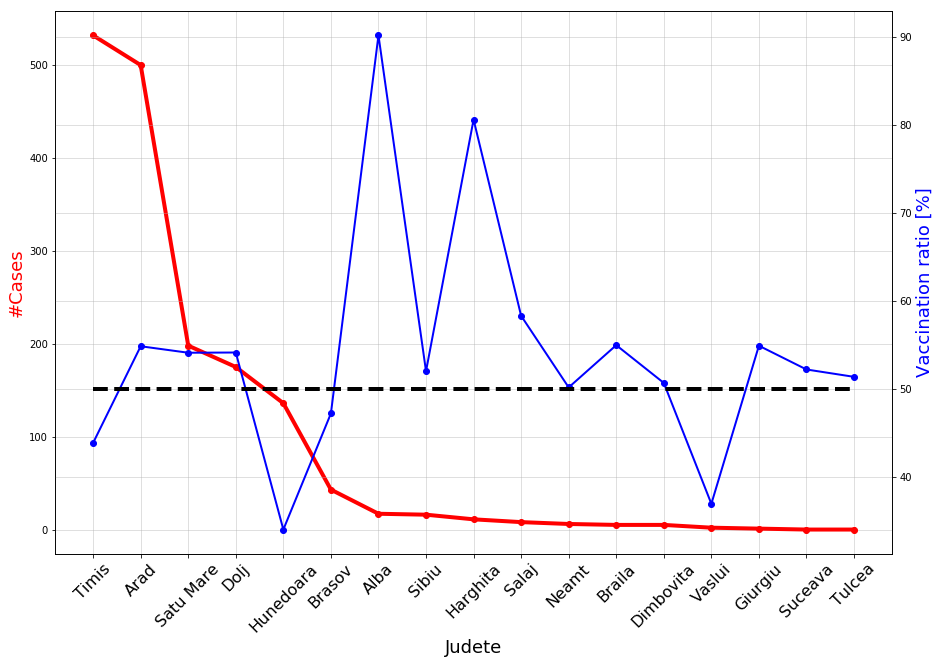

In [18]:
fig, ax1 = plt.subplots(figsize=(15,10))

x_ticks = np.arange(0, len(sorted_rujeola), 1)
x_ticks_labels = [it['judet'] for it in sorted_rujeola]
half_points = [50 for it in sorted_rujeola]

ax2 = ax1.twinx()

ax1.plot(x_ticks, [it['no_cases'] for it in sorted_rujeola], 'r', linewidth=4.0)
ax1.plot(x_ticks, [it['no_cases'] for it in sorted_rujeola], 'ro', linewidth=4.0)

ax2.plot(x_ticks, [it['vaccination_ratio'] for it in sorted_rujeola], 'b', linewidth=2.0)
ax2.plot(x_ticks, [it['vaccination_ratio'] for it in sorted_rujeola], 'bo', linewidth=2.0)
ax2.plot(x_ticks, half_points, 'k--', linewidth=4.0)

ax1.grid(which='both', alpha=0.5) 
ax2.grid(which='both', alpha=0.5) 
ax1.set_xticklabels(x_ticks_labels, rotation='45', fontsize=16)
ax1.set(xticks=x_ticks, xticklabels=x_ticks_labels)

ax1.locator_params(nbins=len(x_ticks)*2, axis='x')
ax2.locator_params(nbins=len(x_ticks)*2, axis='x')
# ax2.set_xticklabels(x_ticks_labels, rotation='45', fontsize=14)

ax1.set_xlabel('Judete', fontsize=18)
ax1.set_ylabel('#Cases', color='r', fontsize=18)
ax2.set_ylabel('Vaccination ratio [%]', color='b', fontsize=18)

plt.show()